# Complete Analysis Of The Late Night Talk Show By Conan

**Worked Really hard for this,Considering I am a Beginner,Would Really Make Me Happy If You Upvote It,If You Like It**



Thanking the Dataset Creator for this dataset

**Late Night Talk Shows are a staple of American television culture and with the shows establishing a digital presence in the form of YouTube channels, this culture has become more global. Some of the channels here have more than 20 Million subscribers which shows the amount of influence they hold in this platform.**



Importing necessary libraries.

![](http://www.google.com/urlsa=i&url=https%3A%2F%2Fen.wikipedia.org%2Fwiki%2FLatenight_talk_show&psig=AOvVaw1qrXPGiJ_AlgVXLsw_lqBP&ust=1594227281121000&source=images&cd=vfe&ved=0CAIQjRxqFwoTCPiakPbNu-oCFQAAAAAdAAAAABAE)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Conan's Hosting : Analysis

Reading the file

In [2]:
conan = pd.read_csv("../input/late-night-talk-show-youtube-dataset/Conan.csv")
 #printing the first five rows 
conan.head()

,publishedAtSQL,videoTitle,videoDescription,videoCategoryId,videoCategoryLabel,durationSec,definition,caption,licensedContent,viewCount,likeCount,dislikeCount,commentCount
0,12-06-2020 12:00,Deon Cole On White Protester Signs That Missed...,Deon Cole shares some white protester signs th...,23,Comedy,124,hd,False,1.0,98817.0,3161.0,186.0,368.0
1,11-06-2020 23:34,Nicole Byer On Finding Humor In Pain - CONAN o...,Nicole Byer on racial inequality in healthcare...,23,Comedy,1200,hd,True,1.0,48337.0,1884.0,115.0,318.0
2,11-06-2020 23:32,Sona Crashes Conan's Interview With Nicole Bye...,"Sona is a huge fan of Nicole Byer, “Nailed It!...",23,Comedy,52,hd,True,1.0,57277.0,1992.0,47.0,147.0
3,11-06-2020 00:00,Senator Cory Booker On This Crossroads In Amer...,Senator Cory Booker discusses the killing of G...,23,Comedy,1917,hd,False,1.0,26466.0,796.0,338.0,399.0
4,10-06-2020 21:03,Senator Cory Booker Wants This To Be A Moral M...,Senator Cory Booker discusses President Trump’...,23,Comedy,447,hd,True,1.0,19033.0,491.0,336.0,264.0


# Data Preprocessing & Cleaning

First lets drop unwanted rows to reduce ambiguity

In [3]:
conan.drop(["publishedAtSQL","definition","videoCategoryId","caption","licensedContent"],axis='columns', inplace=True)
conan.head()

,videoTitle,videoDescription,videoCategoryLabel,durationSec,viewCount,likeCount,dislikeCount,commentCount
0,Deon Cole On White Protester Signs That Missed...,Deon Cole shares some white protester signs th...,Comedy,124,98817.0,3161.0,186.0,368.0
1,Nicole Byer On Finding Humor In Pain - CONAN o...,Nicole Byer on racial inequality in healthcare...,Comedy,1200,48337.0,1884.0,115.0,318.0
2,Sona Crashes Conan's Interview With Nicole Bye...,"Sona is a huge fan of Nicole Byer, “Nailed It!...",Comedy,52,57277.0,1992.0,47.0,147.0
3,Senator Cory Booker On This Crossroads In Amer...,Senator Cory Booker discusses the killing of G...,Comedy,1917,26466.0,796.0,338.0,399.0
4,Senator Cory Booker Wants This To Be A Moral M...,Senator Cory Booker discusses President Trump’...,Comedy,447,19033.0,491.0,336.0,264.0


Lets find the total number of rows present

In [4]:
conan.shape

(8725, 8)

Finding and replacing the null values in the dataset

In [5]:
conan.isnull().sum()

videoTitle             0
videoDescription       2
videoCategoryLabel     2
durationSec            2
viewCount              2
likeCount              2
dislikeCount           2
commentCount          10
dtype: int64

**Created a for loop and replaced the values with the mode(The most repeated values)**

In [6]:


for column in ['durationSec','viewCount','likeCount','dislikeCount','commentCount']:
    conan[column].fillna(conan[column].mode()[0], inplace=True)

**For columns containing String values we find the index and remove it**

In [7]:
viddesnull = conan.loc[conan['videoDescription'].isnull()] 
  
print(viddesnull) 



                                             videoTitle videoDescription  \
1475  Stream Coco LIVE: "Friday The 13th" With CONAN...              NaN   
3678  Manchester By The Sea” Is Basically An Amazon ...              NaN   

     videoCategoryLabel durationSec  viewCount  likeCount  dislikeCount  \
1475      Entertainment           6    28249.0      381.0          43.0   
3678                NaN         300   119292.0      340.0          15.0   

      commentCount  
1475          43.0  
3678          49.0  


In [8]:
vidcatnull = conan.loc[conan['videoCategoryLabel'].isnull()] 
  
print(vidcatnull) 

                                             videoTitle  \
2520  What Conan’s Watching: "This Is Us" Edition - ...   
3678  Manchester By The Sea” Is Basically An Amazon ...   

                                       videoDescription videoCategoryLabel  \
2520  This Is Us” arouses a lot of strong feelings. ...                NaN   
3678                                                NaN                NaN   

     durationSec  viewCount  likeCount  dislikeCount  commentCount  
2520         300   119292.0      340.0          15.0          49.0  
3678         300   119292.0      340.0          15.0          49.0  


In [9]:
conanfinal=conan.drop([1475,2520,3678])
conanfinal.shape

(8722, 8)

# Now there are no Null Values

In [10]:
conanfinal.isnull().sum()


videoTitle            0
videoDescription      0
videoCategoryLabel    0
durationSec           0
viewCount             0
likeCount             0
dislikeCount          0
commentCount          0
dtype: int64

Here **we are finding the unique categories that exist under the video category column**

In [11]:
uniqconan=conanfinal.videoCategoryLabel.unique()
for values in uniqconan:
    print(values)


Comedy
Music
Entertainment
Gaming
News & Politics
Travel & Events
PT1M53S
People & Blogs
Film & Animation
Education


**Finding the sum of total views in each category**

In [12]:
Comedy=conanfinal.viewCount[conanfinal.videoCategoryLabel == 'Comedy'].sum()
print(Comedy)

5749667064.0


In [13]:
Ent=conanfinal.viewCount[conanfinal.videoCategoryLabel == 'Entertainment'].sum()
print(Ent)

973936130.0


In [14]:
Mus=conanfinal.viewCount[conanfinal.videoCategoryLabel == 'Music'].sum()
print(Mus)

125127514.0


In [15]:
Game=conanfinal.viewCount[conanfinal.videoCategoryLabel == 'Gaming'].sum()
print(Game)

8381684.0


In [16]:
Np=conanfinal.viewCount[conanfinal.videoCategoryLabel == 'News & Politics'].sum()
print(Np)

858124.0


In [17]:
TE=conanfinal.viewCount[conanfinal.videoCategoryLabel == 'Travel & Events'].sum()
print(TE)

1279664.0


In [18]:
PB=conanfinal.viewCount[conanfinal.videoCategoryLabel == 'People & Blogs'].sum()
print(PB)

270523.0


In [19]:
FA=conanfinal.viewCount[conanfinal.videoCategoryLabel == 'Film & Animation'].sum()
print(FA)

411134.0


In [20]:
Ed=conanfinal.viewCount[conanfinal.videoCategoryLabel == 'Education'].sum()
print(Ed)

300294.0


# In-depth Exploratory Analysis

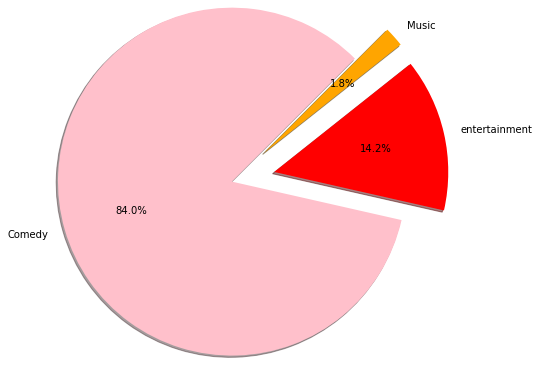

In [21]:
exp_vals=[Comedy,Ent,Mus]
labels=['Comedy','entertainment','Music']
plt.axis('equal')
explode=(0,0.5,0.5)
colors=['Pink','Red','Orange']
plt.pie(exp_vals,radius=2,autopct='%0.1f%%',shadow=True,explode=explode,startangle=45,labels=labels,colors=colors)
plt.show()

We can conclude that people prefer comedy and entertainment the most

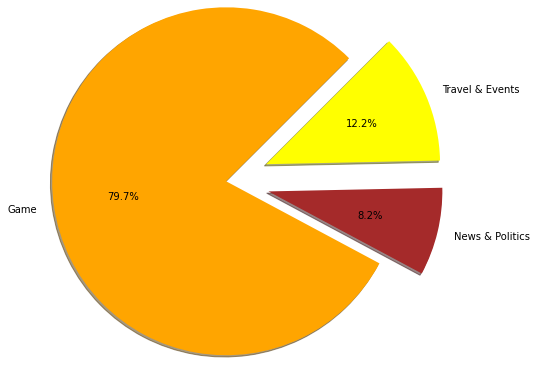

In [22]:
exp_vals=[Game,Np,TE]
labels=['Game','News & Politics','Travel & Events']
plt.axis('equal')
explode=(0,0.5,0.5)
colors=['Orange','Brown','Yellow']
plt.pie(exp_vals,radius=2,autopct='%0.1f%%',shadow=True,explode=explode,startangle=45,labels=labels,colors=colors)
plt.show()


On further exploring the sub levels, the game enthralls more viewers

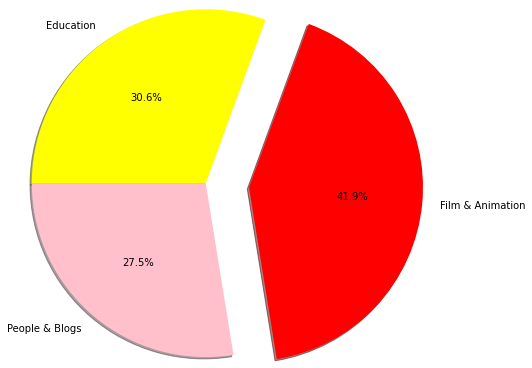

In [23]:
exp_vals=[PB,FA,Ed]
labels=['People & Blogs','Film & Animation','Education']
plt.axis('equal')
colors=['Pink','Red','Yellow']
explode=(0,0.5,0)
plt.pie(exp_vals,radius=2,autopct='%0.1f%%',shadow=True,explode=explode,startangle=180,labels=labels,colors=colors,)
plt.show()


Its funny that people prefer education & blogs the least of all the categories

Thank You!
!

[I am leaving a link of my linear regression model for another notebook! feel free to check it out! its simple]https://www.kaggle.com/sujay12345/prediction-of-you-getting-an-admit-in-us)


# Your feedback is much appreciated